<a href="https://www.kaggle.com/code/chandanarprasad/cosmetics-comparison-by-ingredients?scriptVersionId=155721204" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv('/kaggle/input/cosmetics-datasets/cosmetics.csv')
print(df.shape)
df.head()

(1472, 11)


,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [3]:
df.Brand.value_counts().head(10)

Brand
CLINIQUE              79
SEPHORA COLLECTION    66
SHISEIDO              63
ORIGINS               54
MURAD                 47
PETER THOMAS ROTH     46
KIEHL'S SINCE 1851    46
FRESH                 44
DR. JART+             41
KATE SOMERVILLE       35
Name: count, dtype: int64

In [4]:
df.Label.value_counts().head(10)

Label
Moisturizer    298
Cleanser       281
Face Mask      266
Treatment      248
Eye cream      209
Sun protect    170
Name: count, dtype: int64

In [5]:
df.Price.value_counts(bins=10)

Price
(2.632, 39.7]     662
(39.7, 76.4]      542
(76.4, 113.1]     157
(113.1, 149.8]     41
(149.8, 186.5]     34
(223.2, 259.9]     12
(259.9, 296.6]     11
(186.5, 223.2]      9
(296.6, 333.3]      2
(333.3, 370.0]      2
Name: count, dtype: int64

In [6]:
df[df.Rank>3].sort_values(by = 'Rank',ascending=False).Name

999                 TIME RESPONSE Vintage Wash-off Masque
1219    Neuropeptide Firming & Illuminating Under-Eye ...
1017                                 Uluru Purifying Mask
177                              Tech Neck Prevention Kit
724     Capture Youth Lift Sculptor Age-Delay Lifting ...
                              ...                        
1420    UncompliKated SPF 50 Soft Focus Makeup Setting...
668     Even Better Clinical Dark Spot Corrector & Opt...
1296                   Uplifting Miracle Worker Eye Cream
1455                 Mineral Sport Sunscreen Stick SPF 50
1260    Powerful-Strength Line-Reducing Eye-Brightenin...
Name: Name, Length: 1430, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


In [8]:
selected_label = "Moisturizer"
skin_types = ["Combination", "Dry", "Normal", "Oily", "Sensitive"]

In [9]:
def analyze_label(df, label):
    filtered_df = df[df['Label'] == label]

    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
    fig.suptitle(f'Price vs. Rank for {label}s', fontsize=16)
    fig.delaxes(axes[1, 2])

    for i, skin_type in enumerate(skin_types):
        # Filtered DataFrame for the current skin type
        filtered_skin_df = filtered_df[filtered_df[skin_type] == 1]

        # Define color gradient based on rank
        rank_color = filtered_skin_df['Rank'] / filtered_skin_df['Rank'].max()  # Adjust for color scaling

        # Find the top 3 ranks
        top_3_indices = filtered_skin_df['Rank'].nlargest(3).index

        # Scatterplot of Price vs. Rank with color gradient
        scatter = sns.scatterplot(
            data=filtered_skin_df, x='Price', y='Rank',
            hue=rank_color, palette='viridis', ax=axes[i // 3, i % 3]
        )
        scatter.get_legend().remove()  # Remove the legend

        # Add mean and median lines
        mean_price = filtered_skin_df['Price'].mean()
        median_price = filtered_skin_df['Price'].median()
        mean_rank = filtered_skin_df['Rank'].mean()
        median_rank = filtered_skin_df['Rank'].median()

        axes[i // 3, i % 3].axvline(x=mean_price, color='red', linestyle='--', label='Mean Price')
        axes[i // 3, i % 3].axvline(x=median_price, color='green', linestyle='--', label='Median Price')
        axes[i // 3, i % 3].axhline(y=mean_rank, color='blue', linestyle='--', label='Mean Rank')
        axes[i // 3, i % 3].axhline(y=median_rank, color='purple', linestyle='--', label='Median Rank')

        # Highlight top 3 ranks with different colors or shapes
        axes[i // 3, i % 3].scatter(
            filtered_skin_df.loc[top_3_indices, 'Price'],
            filtered_skin_df.loc[top_3_indices, 'Rank'],
            color='orange', marker='^', s=100, label='Top 3 Ranks'
        )

        axes[i // 3, i % 3].set_title(f'Price vs. Rank ({skin_type} Skin)')
        axes[i // 3, i % 3].legend()

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust title position
    plt.show()

    # Calculate and print summary statistics
    summary_stats = filtered_df[['Price', 'Rank']].describe()
    print(f'Summary Statistics for {label}s:\n{summary_stats}')


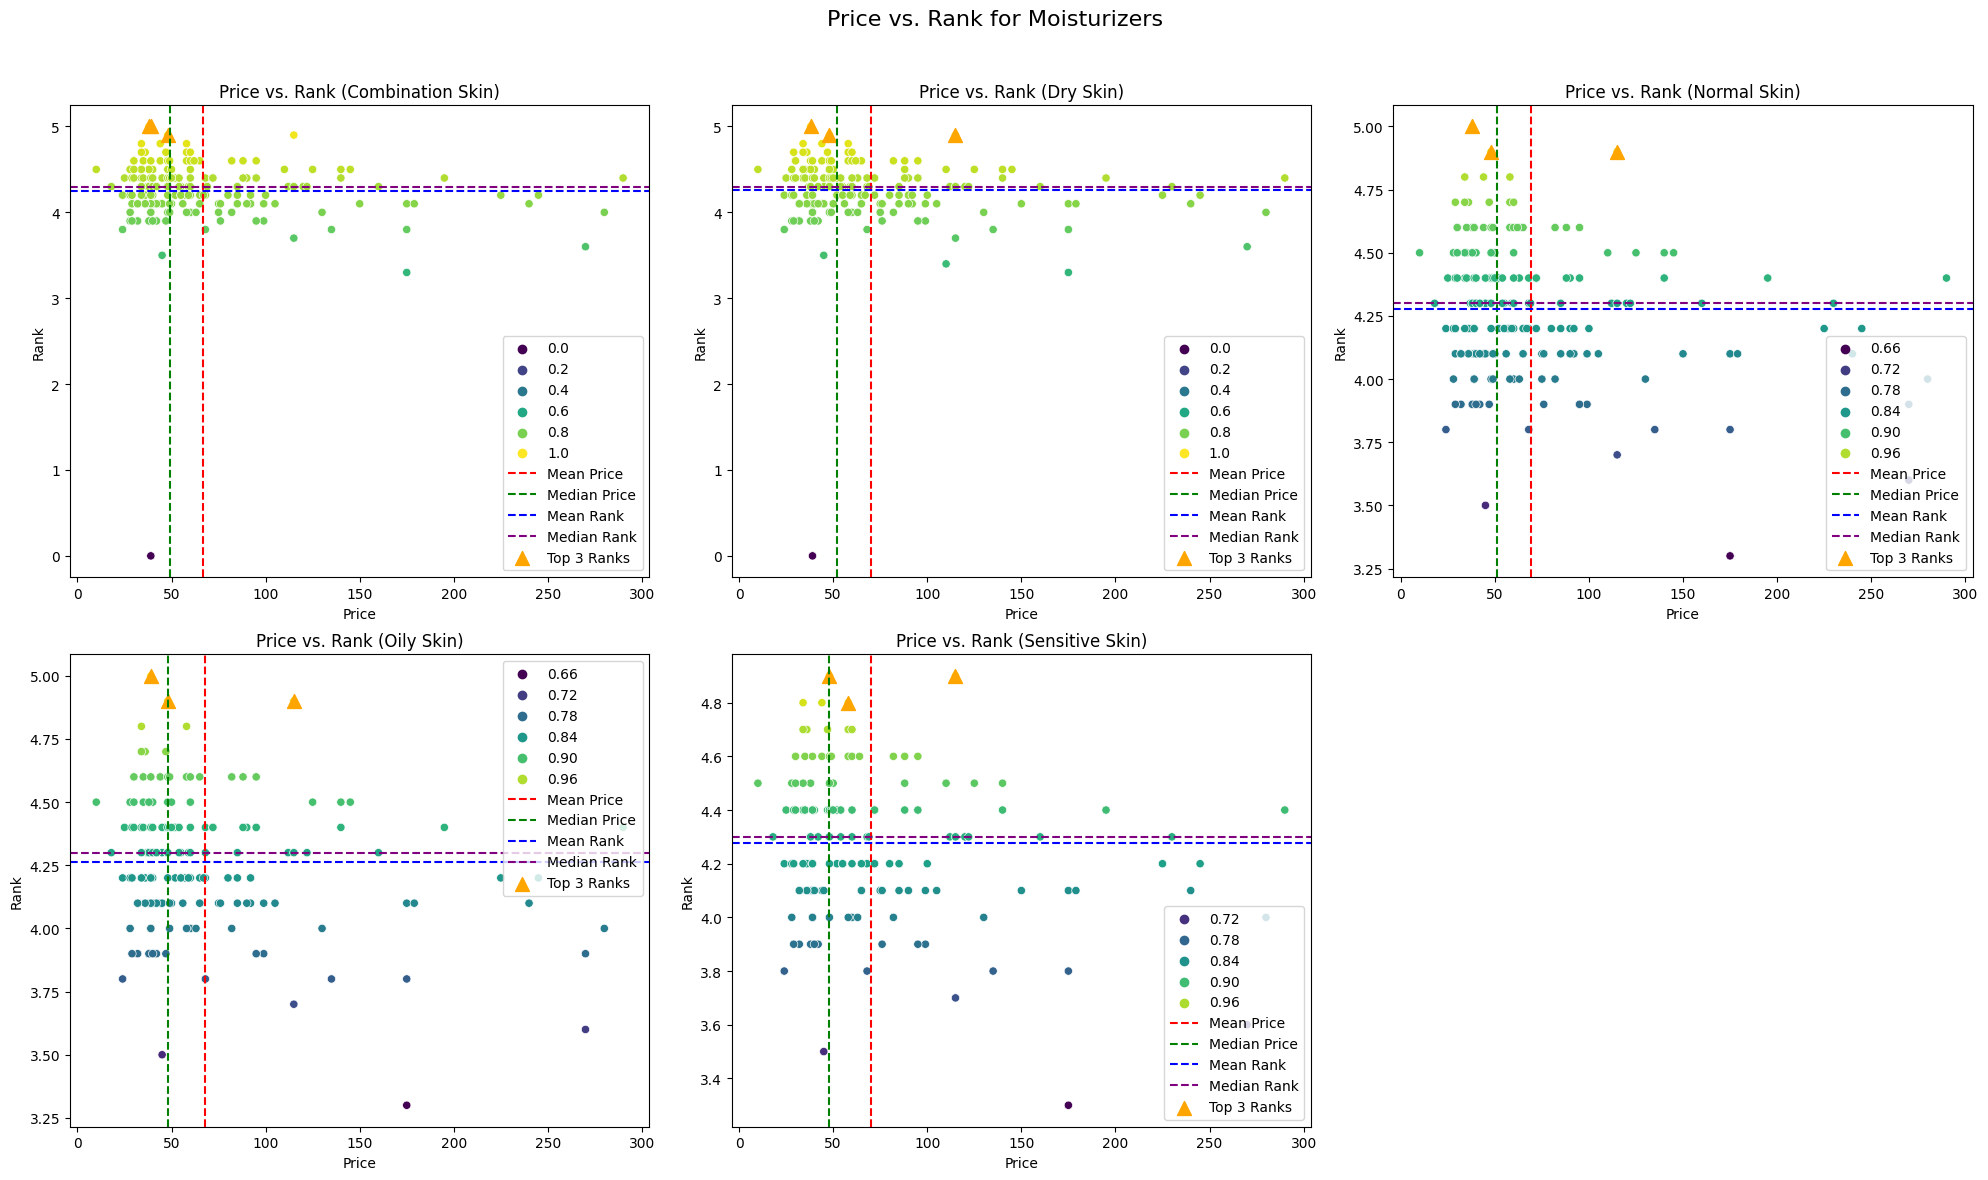

Summary Statistics for Moisturizers:
            Price        Rank
count  298.000000  298.000000
mean    69.087248    4.238591
std     50.839145    0.509262
min      4.000000    0.000000
25%     39.000000    4.100000
50%     50.000000    4.300000
75%     82.000000    4.400000
max    325.000000    5.000000


In [10]:
analyze_label(df, "Moisturizer")

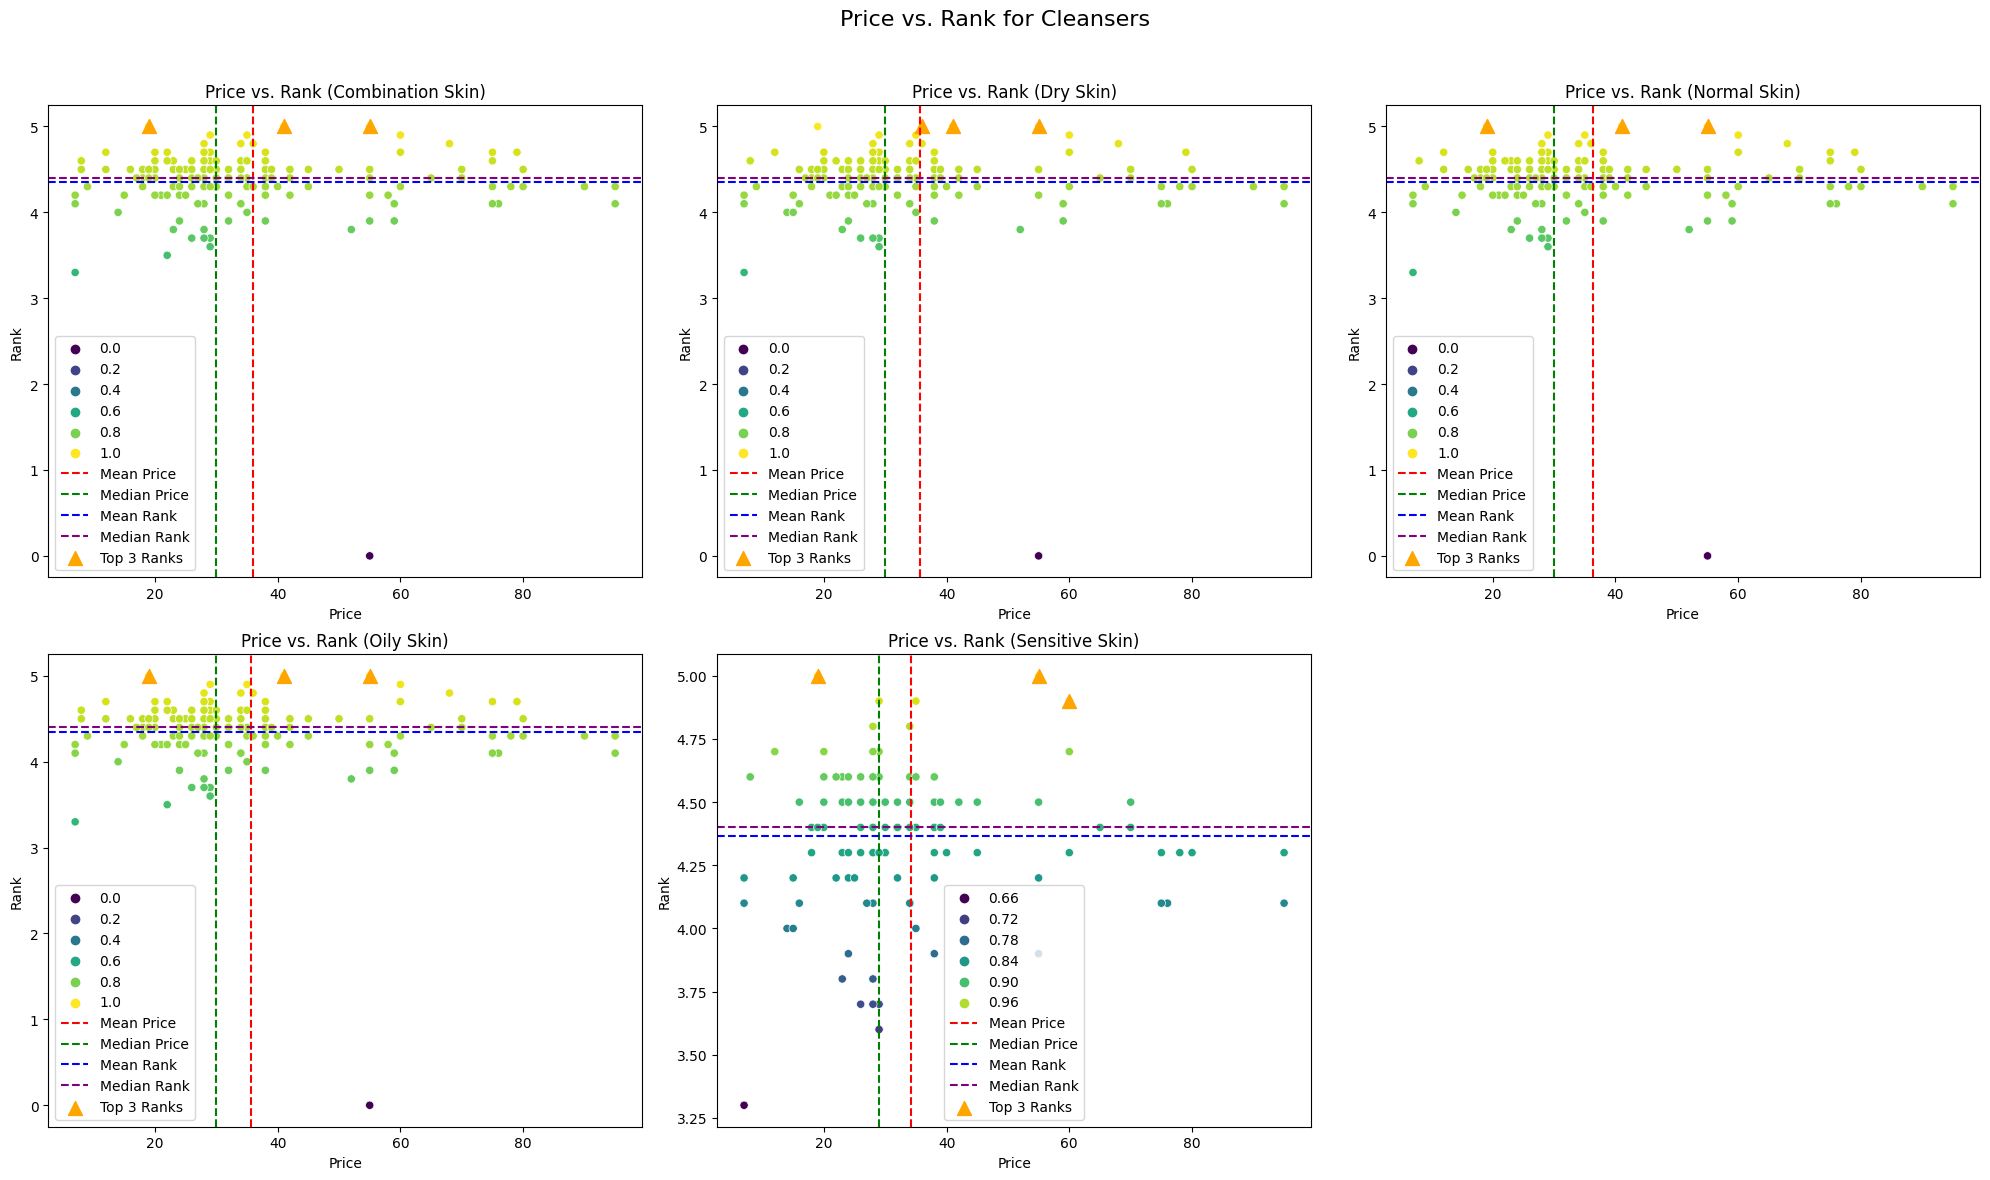

Summary Statistics for Cleansers:
            Price        Rank
count  281.000000  281.000000
mean    32.601423    4.312456
std     18.139672    0.646989
min      4.000000    0.000000
25%     22.000000    4.300000
50%     28.000000    4.400000
75%     38.000000    4.500000
max     95.000000    5.000000


In [11]:
analyze_label(df, "Cleanser")

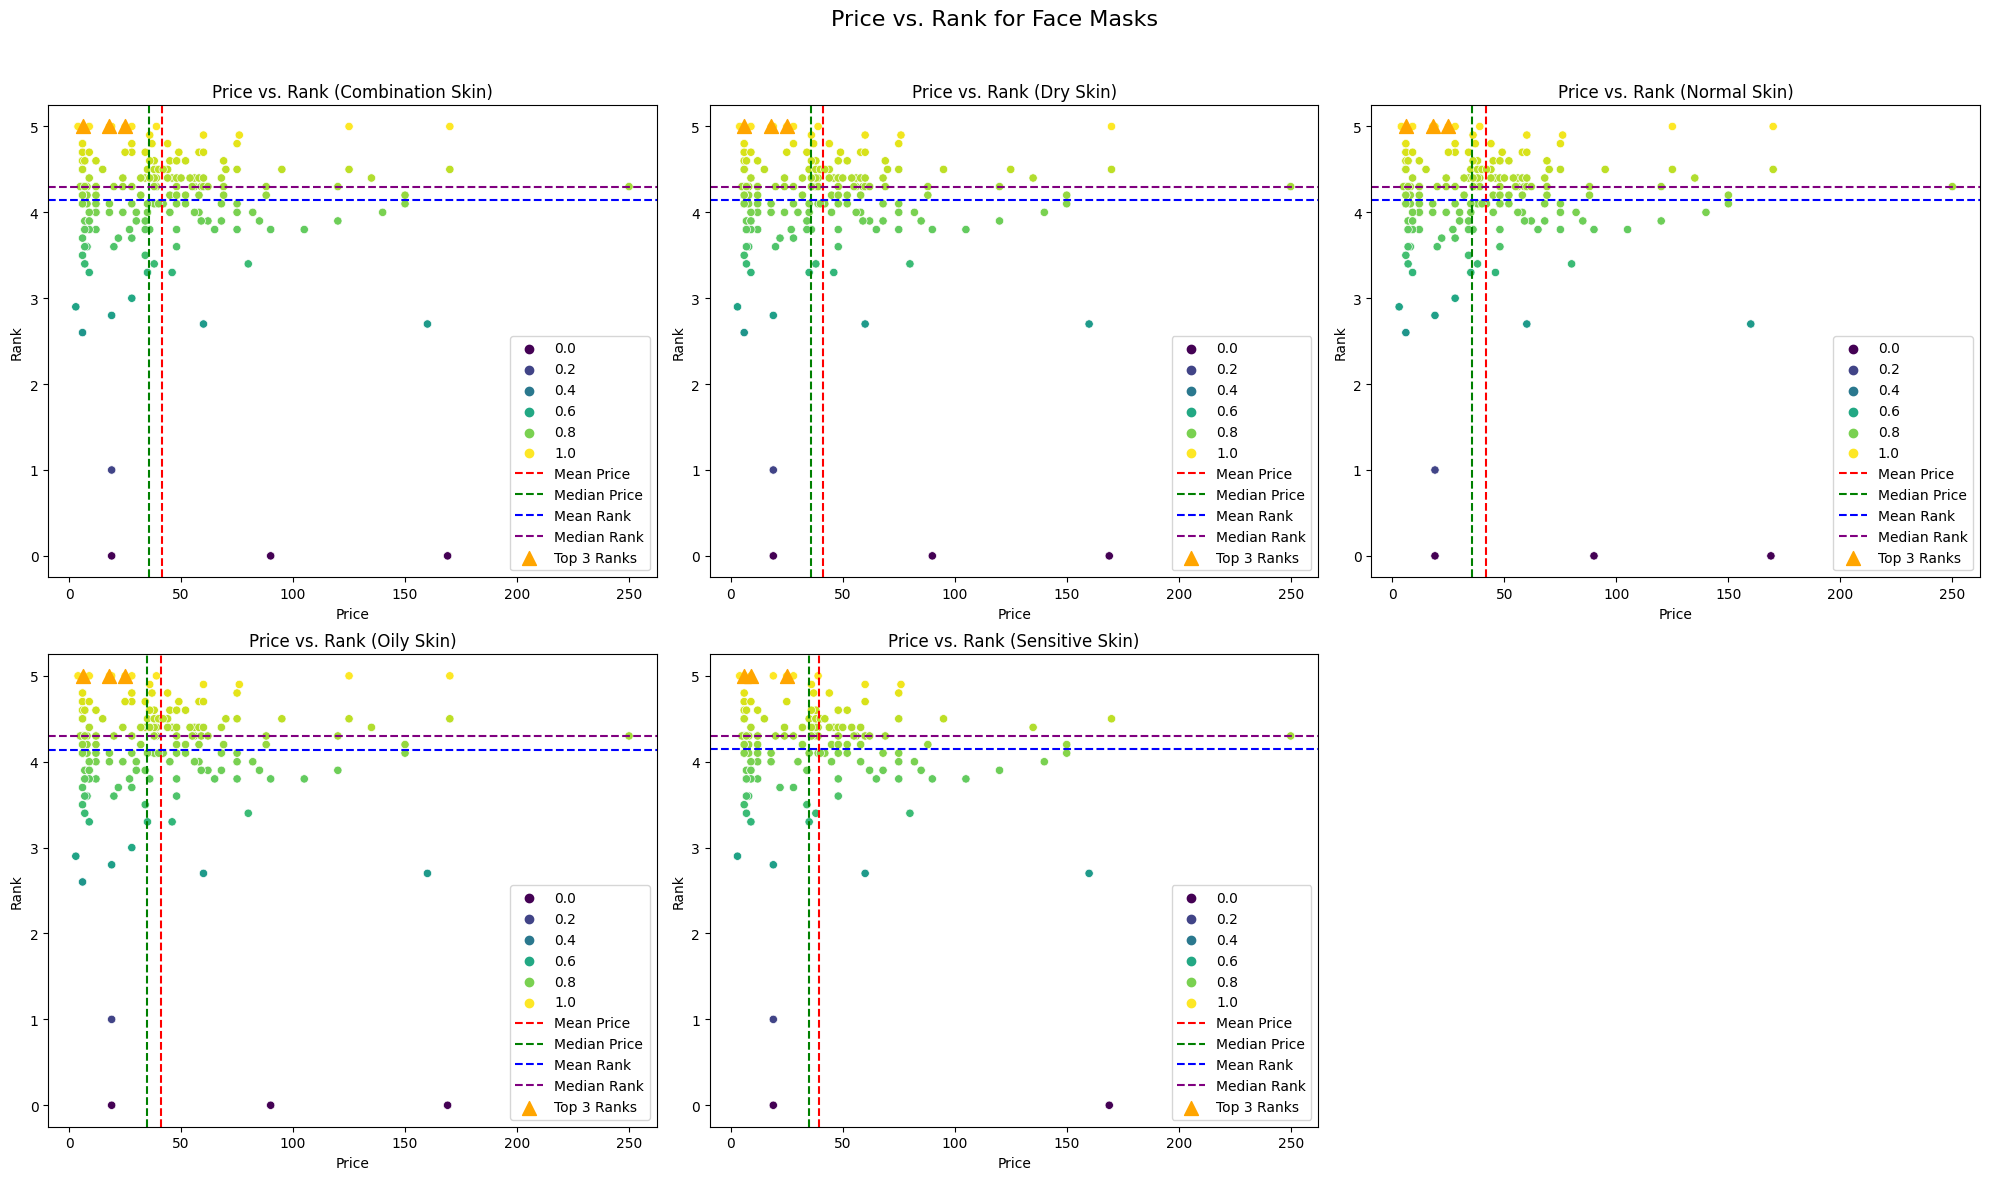

Summary Statistics for Face Masks:
            Price        Rank
count  266.000000  266.000000
mean    42.624060    4.166917
std     40.857618    0.712341
min      3.000000    0.000000
25%      9.750000    4.000000
50%     36.000000    4.300000
75%     58.000000    4.500000
max    250.000000    5.000000


In [12]:
analyze_label(df, "Face Mask")

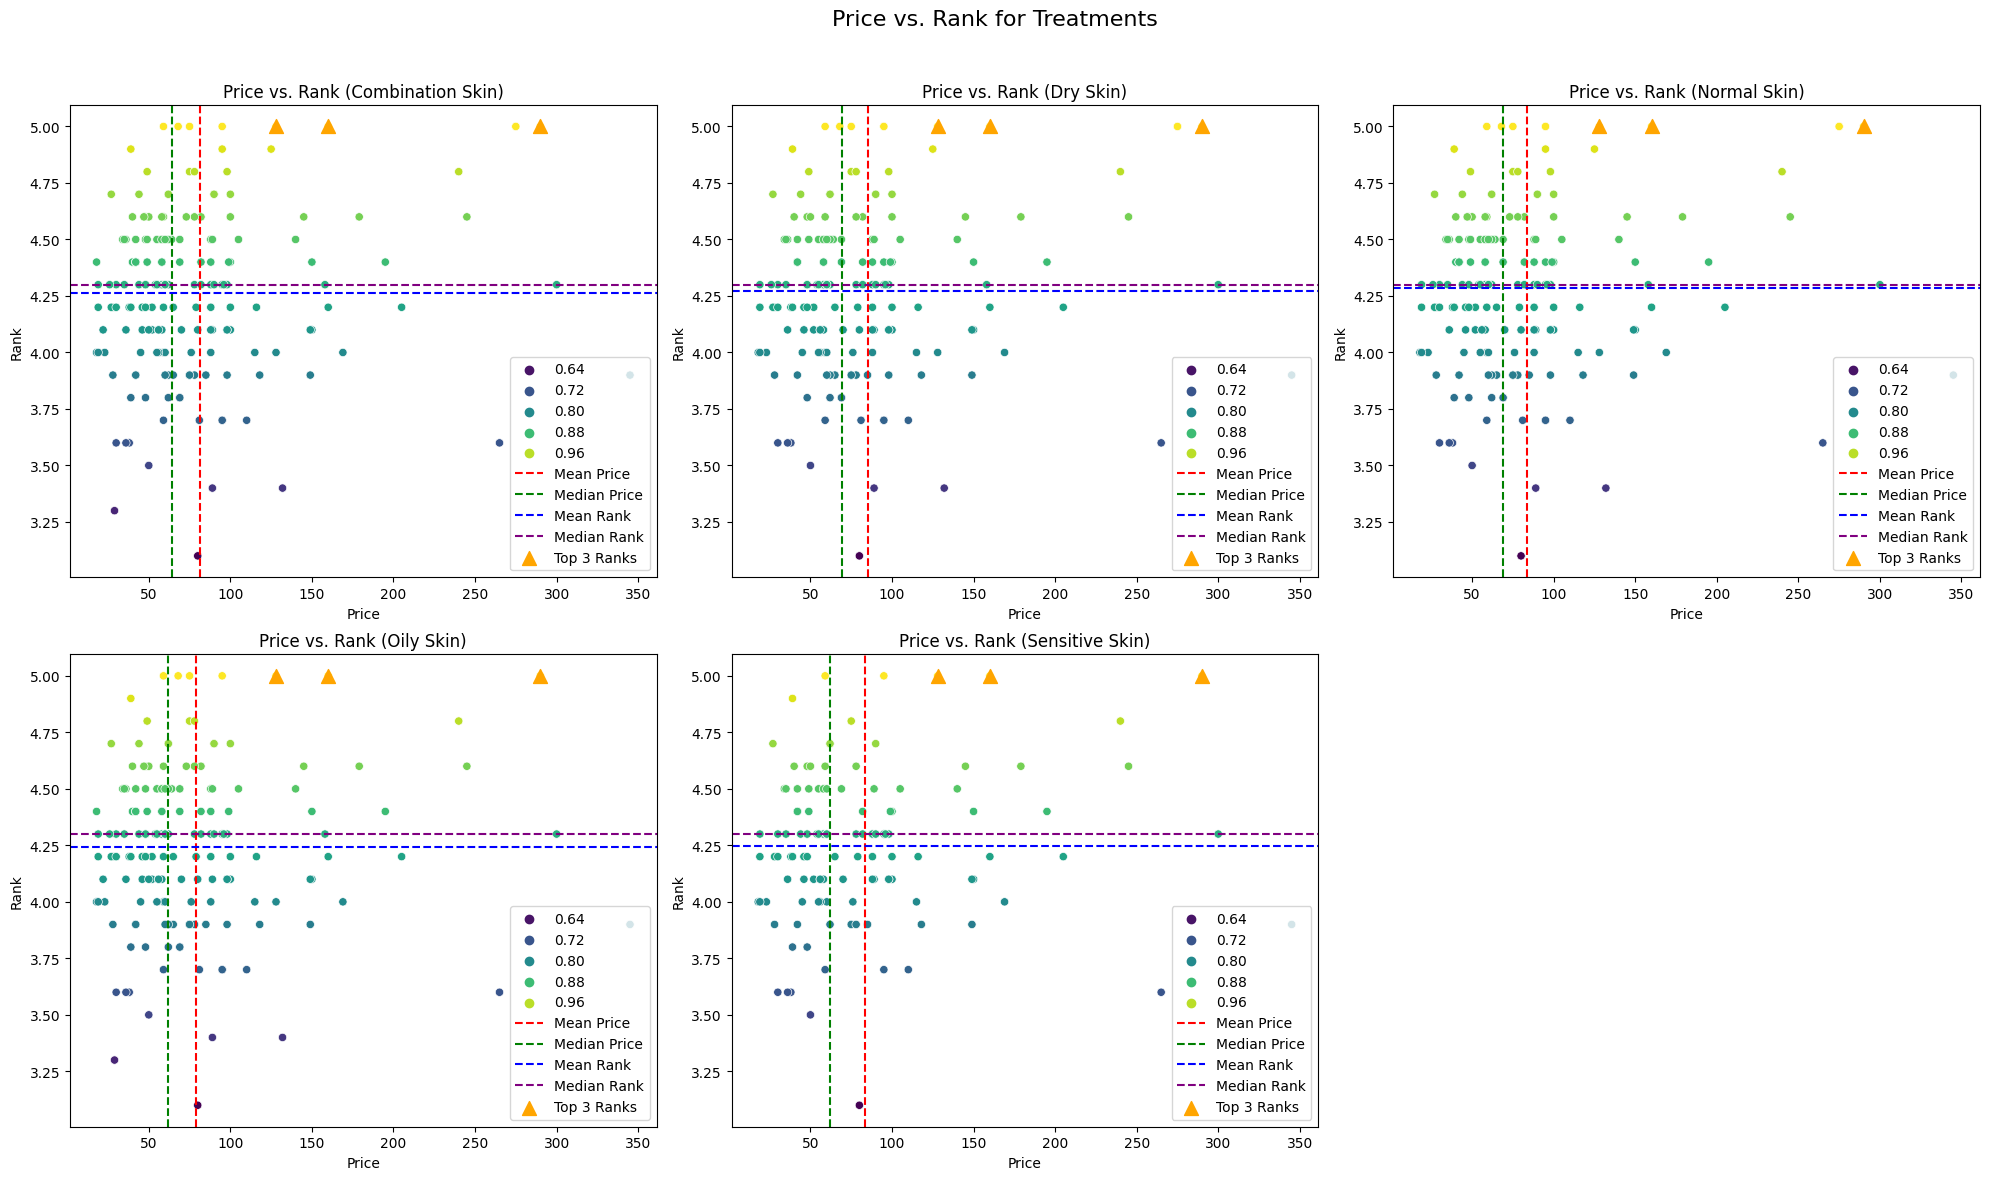

Summary Statistics for Treatments:
            Price        Rank
count  248.000000  248.000000
mean    79.177419    4.218145
std     54.559784    0.468473
min     18.000000    0.000000
25%     46.750000    4.000000
50%     64.500000    4.300000
75%     95.000000    4.500000
max    370.000000    5.000000


In [13]:
analyze_label(df, "Treatment")

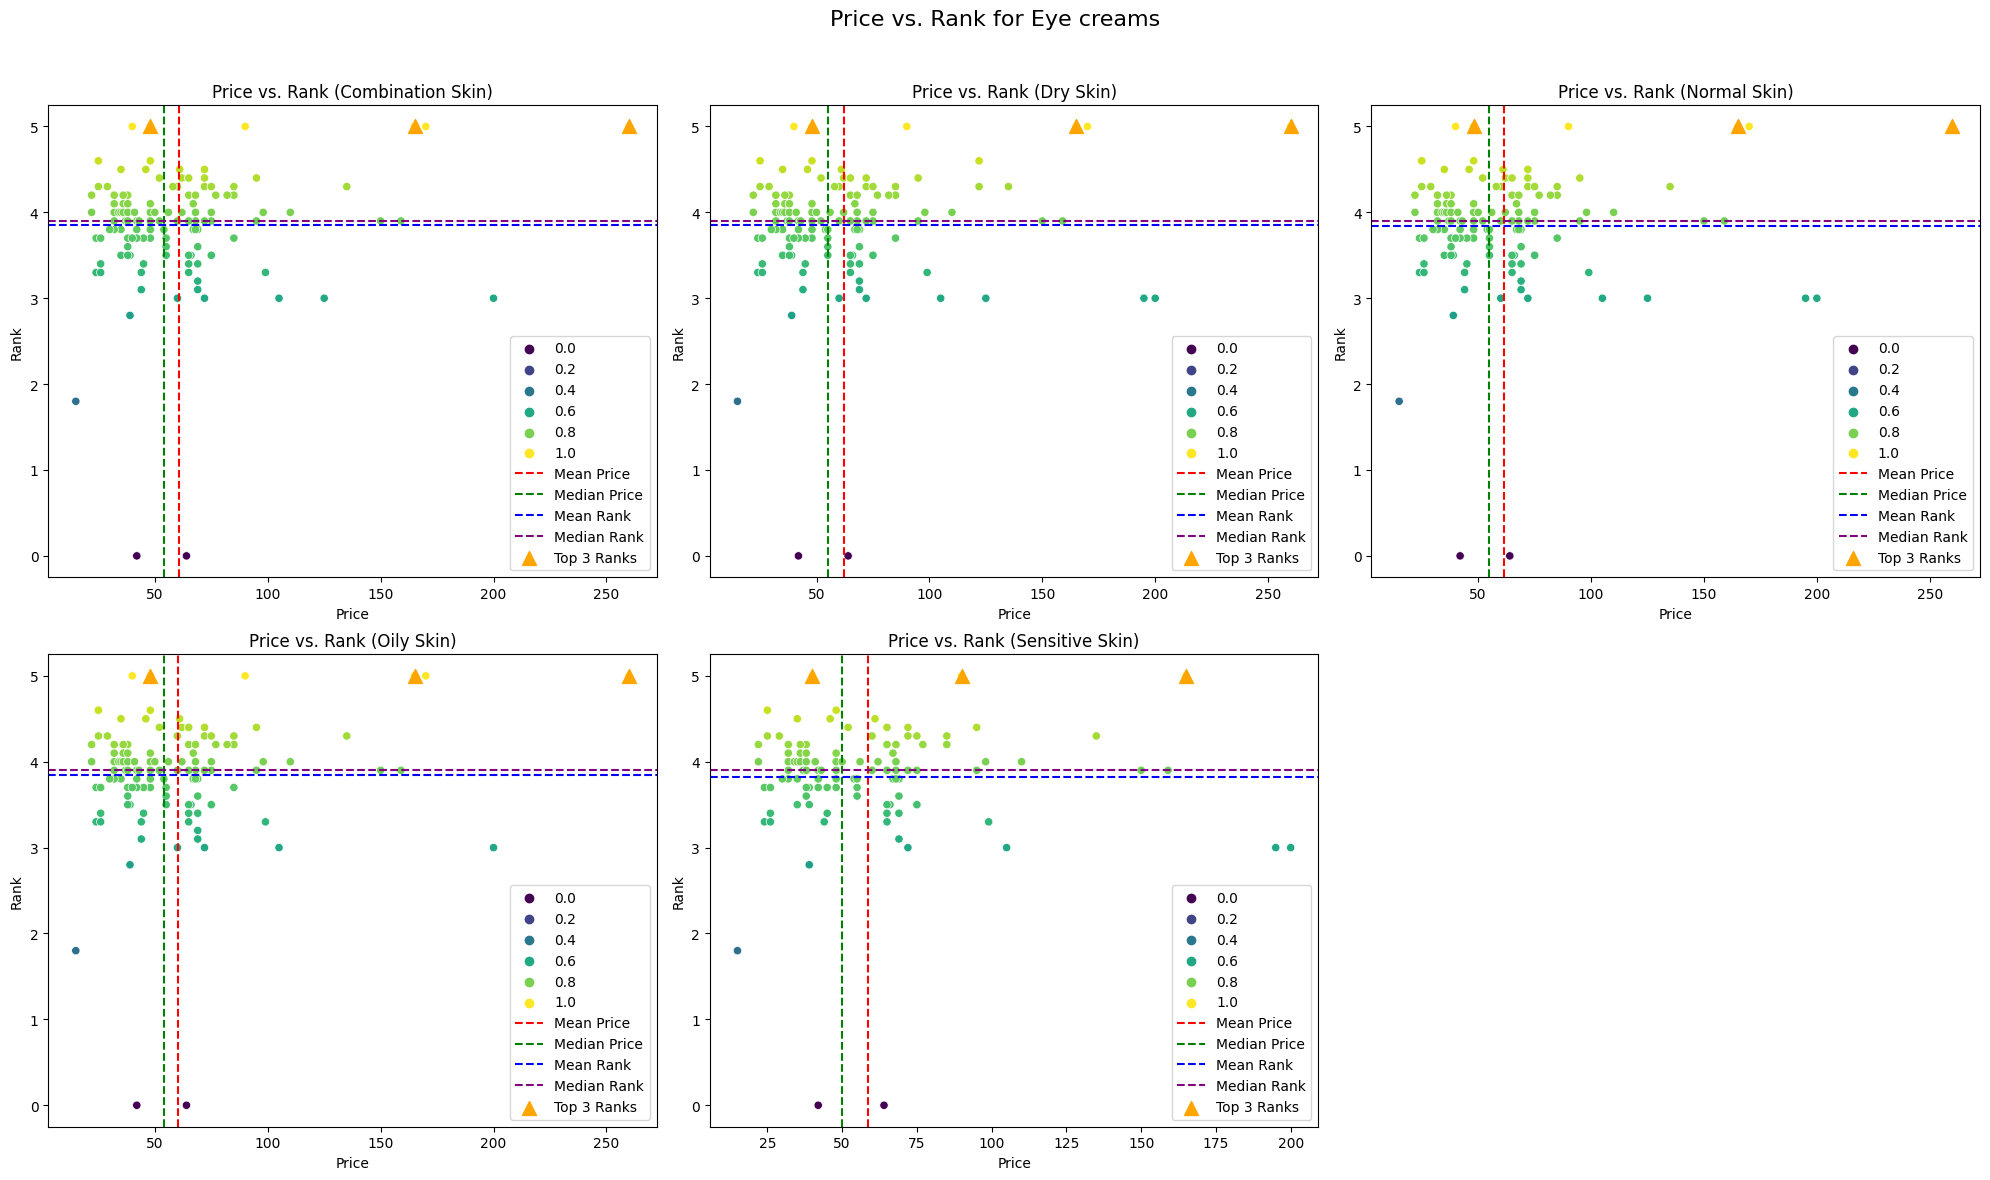

Summary Statistics for Eye creams:
            Price        Rank
count  209.000000  209.000000
mean    63.602871    3.806220
std     42.063142    0.694075
min      5.000000    0.000000
25%     38.000000    3.600000
50%     52.000000    3.900000
75%     72.000000    4.100000
max    260.000000    5.000000


In [14]:
analyze_label(df, "Eye cream")

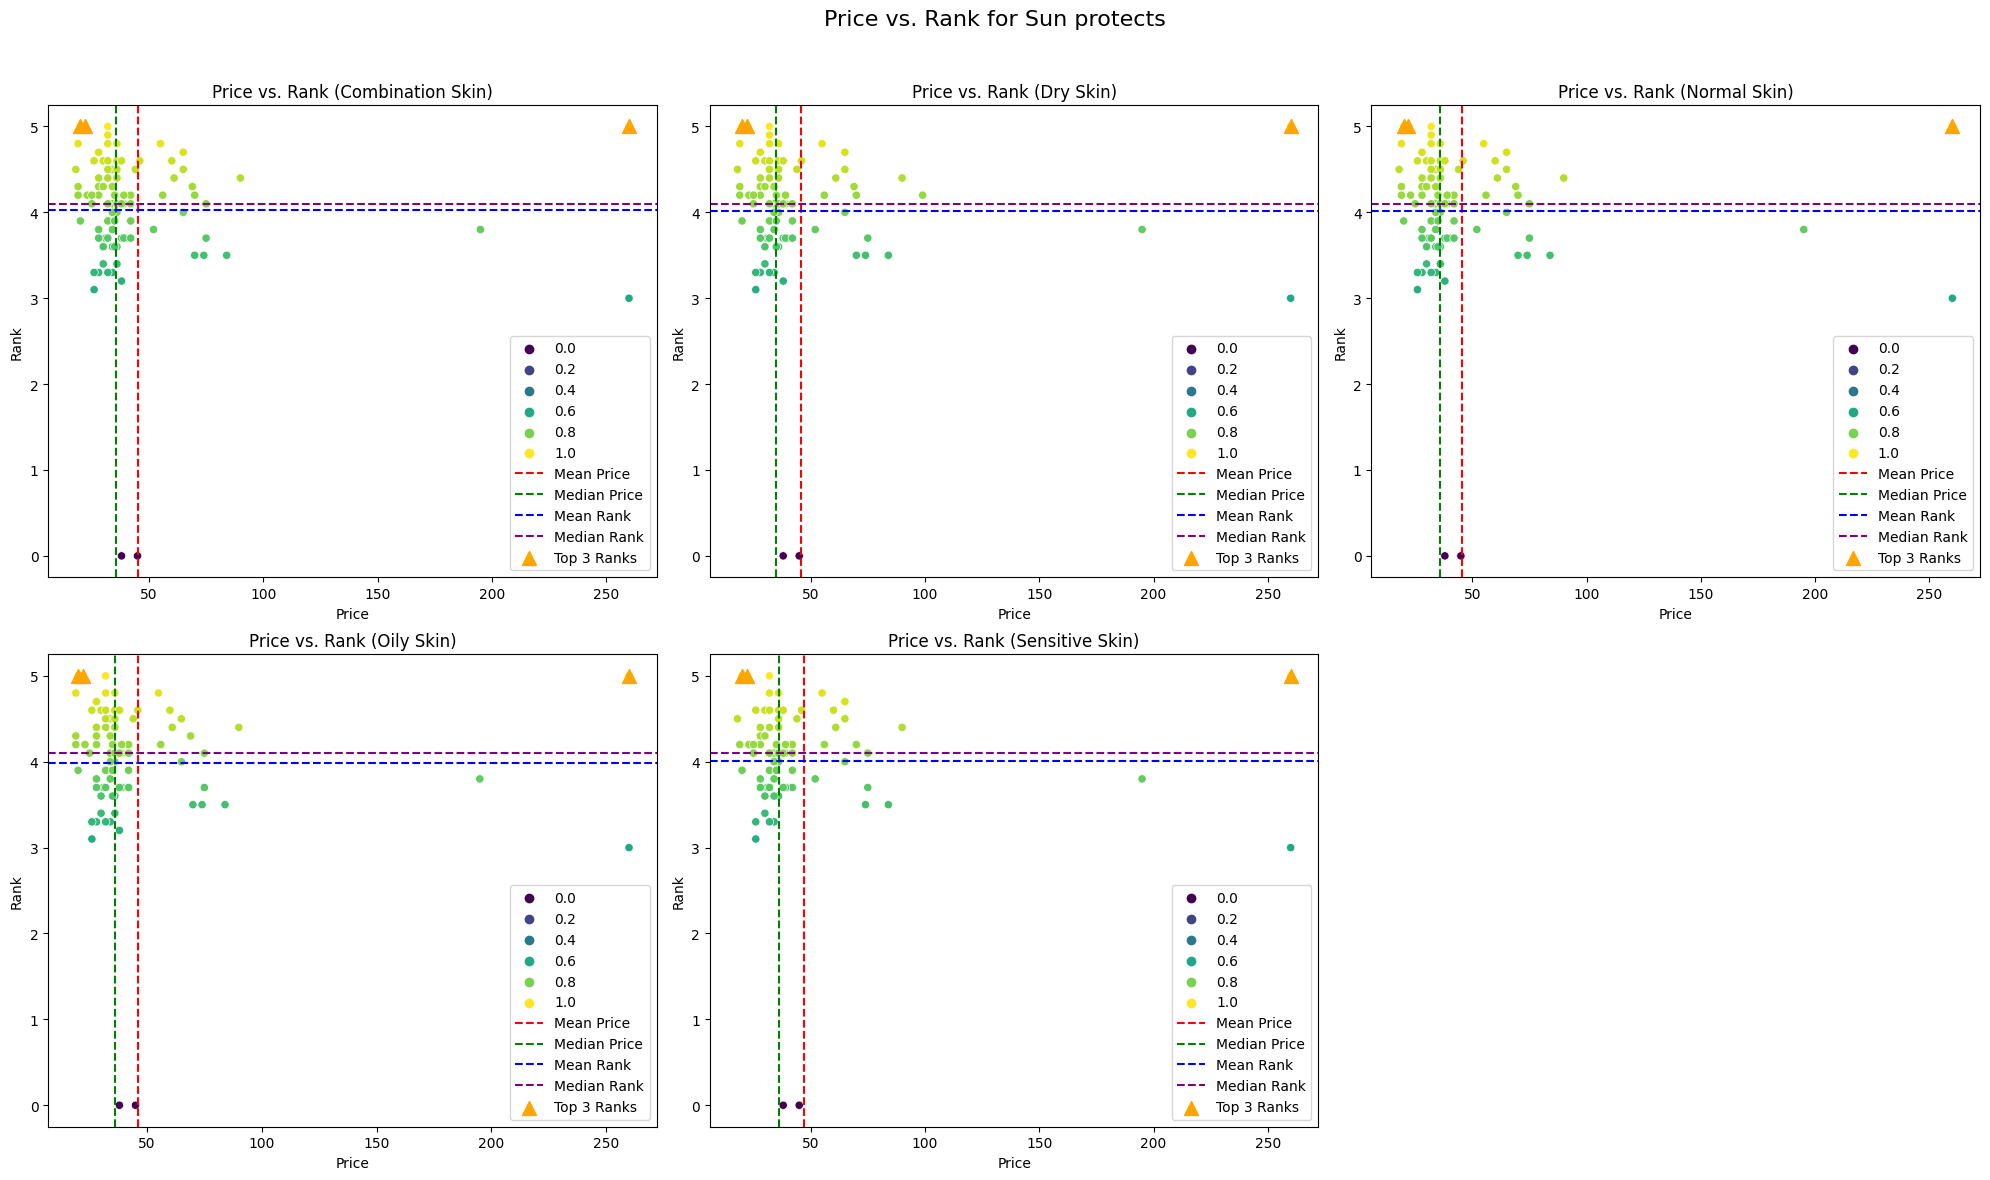

Summary Statistics for Sun protects:
            Price        Rank
count  170.000000  170.000000
mean    45.905882    4.051176
std     30.809252    0.646725
min     18.000000    0.000000
25%     32.000000    3.800000
50%     38.000000    4.100000
75%     49.000000    4.400000
max    260.000000    5.000000


In [15]:
analyze_label(df, "Sun protect")